# Введение в регрессионный анализ
## Семинар 4. Доверительный интервал для наклона регрессии

Импортируем необходимые библиотеки, модули и функции:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.formula.api import ols

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


В этом практикуме мы будем работать с данными о качестве жизни в крупных городах. Пояснения по столбцам в файле `city24.csv`:
    
* `city`: название города;
* `Decibel_Level`: уровень шума;
* `Traffic_Density`: плотность трафика, интенсивность дорожного движения;
* `Green_Space_Area`: площадь зелёных насаждений;
* `Air_Quality_Index`: индекс качества воздуха (чем выше, тем грязнее воздух);
* `Happiness_Score`: индекс счастья;
* `Cost_of_Living_Index`: индекс стоимости жизни;
* `Healthcare_Index`: индекс качества здравоохранения.

## Часть 1: описание данных и оценка моделей

Загрузите данные из файла `city24.csv` и сохраните их в датафрейм `df`.

In [2]:
df = pd.read_csv("city24.csv")

### Задача 1

Выберите строки, которые соответствуют городам с низкой или средней транспортной загруженностью (столбец `Traffic_Density`), и сохраните их в датафрейм `chosen`. В последующих заданиях нужно работать именно с этим датафреймом. 

In [3]:
# посмотрим на значения
df["Traffic_Density"].value_counts()

Low          48
High         26
Medium       22
Very High    19
Name: Traffic_Density, dtype: int64

In [4]:
chosen = df[(df["Traffic_Density"] == "Low") | 
            (df["Traffic_Density"] == "Medium")]

### Задача 2

Отсортируйте строки в датафрейме `chosen` по убыванию значений индекса счастья. Посмотрите на полученные результаты. 

*Подсказка:* метод `.sort_values()`, применяется к датафрейму, для настройки порядка сортировки используется аргумент `ascending`.

In [5]:
chosen.sort_values("Happiness_Score", ascending = False)

,Unnamed: 0,City,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
78,78,Nelson,50,Low,100,10,8.5,70,97
82,82,Palmerston North,55,Low,125,20,8.5,45,98
33,33,Oslo,50,Low,85,25,8.5,115,99
86,86,Gisborne,55,Low,145,20,8.4,25,98
77,77,Queenstown,55,Low,95,15,8.4,75,96
...,...,...,...,...,...,...,...,...,...
110,110,Te Hana,55,Low,265,20,5.5,25,98
111,111,Waipu,60,Medium,270,35,5.2,20,95
112,112,Ruakaka,55,Low,275,30,5.0,25,96
113,113,Whangarei,50,Low,280,25,4.8,20,97


### Задача 3

В дальнейшем анализе нас будут интересовать переменные `Happiness_Score`, `Decibel_Level` и `Cost_of_Living_Index`. Давайте построим гистограммы для визуализации их распределения, только не по-отдельности, а все сразу. Воспользуемся более продвинутым способом построения графиков, обращаясь к функциям модуля `plt`, который мы импортировали из библиотеки `matplotlib`. 

В этом модуле есть функция `subplots()`, которая создает несколько подграфиков внутри одного изображения. Так, мы можем создать сетку из графиков из одной строки и трех столбцов, то есть поставить три графика в один ряд:

(<Figure size 432x288 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

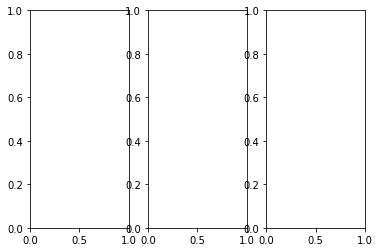

In [6]:
plt.subplots(nrows = 1, ncols = 3)

Пока это набор из трёх пустых координатных плоскостей (осей) внутри одной картинки. Сохраним результаты, возвращённые функцией, в переменные. Так как первый результат – это изображение, его часто называют `fig` (от *figure*). Второй результат – это набор осей, его обычно сокращают до `ax` (*axes*). Заодно установим размер картинки 16 на 9 дюймов:

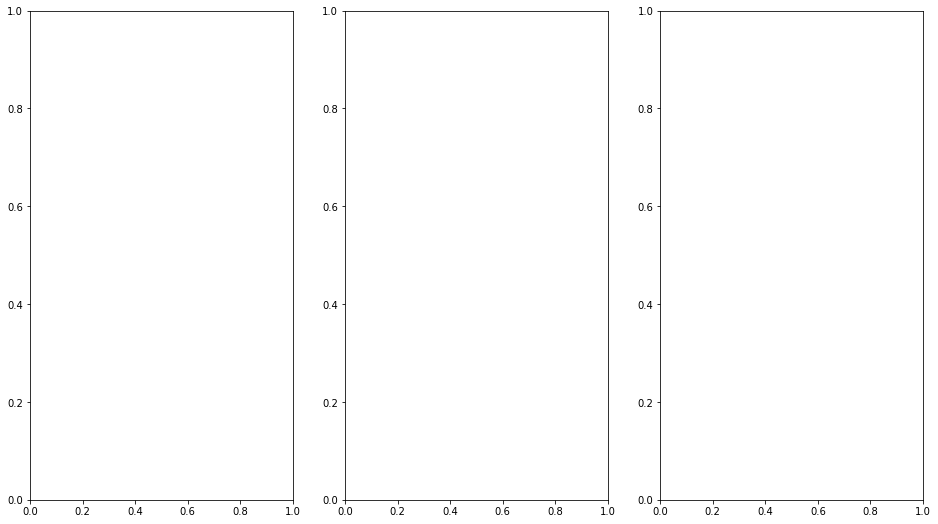

In [7]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 9));

Теперь осталось добавить в каждую координатную плоскость по графику. Гистограмму для `Happiness_Score` поместим в первую плоскость `axes[0]` – код для этого действия уже написан, можете добавить свой цвет заливки в `color`. 

Дополните код так, чтобы во второй координатной плоскости была гистограмма для `Decibel_Level`, а в третьей – для `Cost_of_Living_Index`. Прокомментируйте полученные гистограммы.

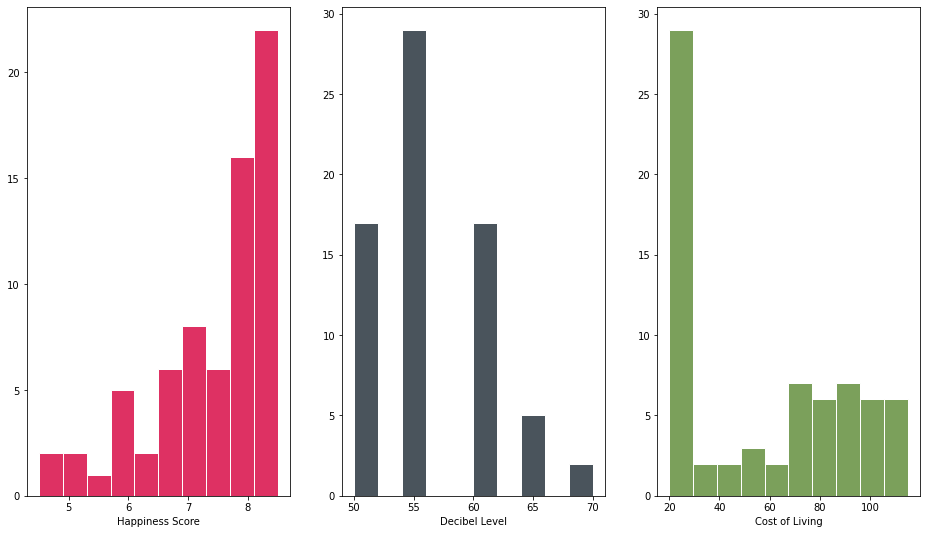

In [8]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 9));

axes[0].hist(chosen["Happiness_Score"], color = "#DE3163", edgecolor = "white");
axes[0].set_xlabel("Happiness Score");

axes[1].hist(chosen["Decibel_Level"], color = "#4A545C", edgecolor = "white");
axes[1].set_xlabel("Decibel Level");

axes[2].hist(chosen["Cost_of_Living_Index"], color = "#7BA05B", edgecolor = "white");
axes[2].set_xlabel("Cost of Living");

### Задача 4

Постройте модель линейной регрессии, которая описывает связь между индексом счастья и уровнем шума. Сохраните её в переменную `model01` и выведите на экран полную выдачу с результатами оценки модели. Запишите уравнение модели, приведите содержательную интерпретацию оценок коэффициентов. Можно ли считать, приняв уровень доверия равным 95%, что уровень шума оказывает эффект на уровень счастья? Изменится ли вывод, если мы изменим уровень доверия на 90% или 99%?

In [9]:
model01 = ols("Happiness_Score ~ Decibel_Level", data = chosen).fit()
print(model01.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     10.72
Date:                Tue, 01 Oct 2024   Prob (F-statistic):            0.00167
Time:                        12:52:32   Log-Likelihood:                -93.244
No. Observations:                  70   AIC:                             190.5
Df Residuals:                      68   BIC:                             195.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.5213      1.268      9.084

* Уравнение модели: $\widehat{Happiness}_i = 11.52 -0.07 \times DecibelLevel_i$;
* При уровне шума 0, согласно модели, среднее значение индекса счастья равно 11.52. При увеличении уровня шума на один децибел, индекс счастья, в среднем, снижается на 0.07 единиц. 
* На уровне доверия 95% гипотеза о равенстве коэффициента при уровне шума нулю отвергается, так как, во-первых, наблюдаемое значение t-статистики попадает в критическую область, во-вторых, p-value меньше 0.05, в-третьих, 95%-ный доверительный интервал для оценки коэффициента не накрывает 0. Эффект уровня шума на уровень счастья есть, и он статистически значимый.
* На уровнях доверия 90% и 99% вывод не изменится, наблюдаемое значение t-статистики превышает по модулю 3, значит, выходит за границы достоверных значений при любом уровне доверия, p-value мало, примерно 0.002.

### Задача 5

Постройте модель линейной регрессии, которая описывает связь между индексом счастья и индексом стоимости жизни. Сохраните её в переменную `model02` и выведите на экран полную выдачу с результатами оценки модели. Запишите уравнение модели, приведите содержательную интерпретацию оценок коэффициентов. Можно ли считать, приняв уровень доверия равным 95%, что уровень шума оказывает эффект на уровень счастья? Изменится ли вывод, если мы изменим уровень доверия на 90% или 99%?

In [10]:
model02 = ols("Happiness_Score ~ Cost_of_Living_Index", data = chosen).fit()
print(model02.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     5.365
Date:                Tue, 01 Oct 2024   Prob (F-statistic):             0.0236
Time:                        12:52:35   Log-Likelihood:                -95.707
No. Observations:                  70   AIC:                             195.4
Df Residuals:                      68   BIC:                             199.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.9373 

* Уравнение модели: $\widehat{Happiness}_i = 6.93 + 0.008 \times CostLiving_i$;
* При нулевом значении индекса стоимости жизни, согласно модели, среднее значение индекса счастья равно 6.93. При увеличении индекса стоимости жизни на один децибел, индекс счастья, в среднем, увеличивается на 0.008 единиц. 
* На уровне доверия 95% гипотеза о равенстве коэффициента при индексе стоимости жизни нулю отвергается, так как, во-первых, наблюдаемое значение t-статистики попадает в критическую область, во-вторых, p-value меньше 0.05, в-третьих, 95%-ный доверительный интервал для оценки коэффициента не накрывает 0. Значит, эффект стоимости жизни на уровень счастья есть, просто небольшой (что понятно, есть много других факторов, которые влияют на ощущение счастья, а мы их в модель не включили).
* На уровне доверия 90% ничего не меняется.
* На уровне доверия 99% вывод меняется на противоположный, гипотеза о равенстве коэффициента при индексе стоимости жизни нулю не отвергается, так как область достоверных значений [$-2.57$, $2.57$], а $t_{набл} = 2.316$. Плюс, p-value больше 0.01.

### Задача 6

По умолчанию метод `.summary()` вычисляет и выводит границы 95%-ного доверительного интервала для оценки коэффициента. Однако это можно скорректировать, добавив аргумент `alpha` (уровень значимости). Измените уровни доверия на 90% и 99% и выведите новые результаты для модели из предыдущей задачи. Прокомментируйте полученные результаты.

In [11]:
# уровень доверия 0.9
print(model02.summary(alpha=0.1))

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     5.365
Date:                Tue, 01 Oct 2024   Prob (F-statistic):             0.0236
Time:                        12:52:38   Log-Likelihood:                -95.707
No. Observations:                  70   AIC:                             195.4
Df Residuals:                      68   BIC:                             199.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|       [0.05       0.95]
----------------------------------------------------------------------------------------
Intercept                6.9373 

In [12]:
# уровень доверия 0.99
print(model02.summary(alpha=0.01))

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     5.365
Date:                Tue, 01 Oct 2024   Prob (F-statistic):             0.0236
Time:                        12:52:38   Log-Likelihood:                -95.707
No. Observations:                  70   AIC:                             195.4
Df Residuals:                      68   BIC:                             199.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.005      0.995]
----------------------------------------------------------------------------------------
Intercept                6.9373 

> Тут интересна выдача для уровня доверия 99%. В дополнение к предыдущим выкладкам, видно, что доверительный интервал накрывает 0, гипотеза о равенстве наклона нулю не отвергается.

## Часть 2: представление результатов – таблицы

В статьях и отчётах выдачи с результатами регрессионного анализа обычно выглядят иначе, чем в Python. Установим библиотеку `stargazer` для экспорта результатов регрессионного анализа в красивом табличном виде:

In [ ]:
!pip install stargazer

Импортируем класс `Stargazer`:

In [13]:
from stargazer.stargazer import Stargazer

С помощью этого класса мы можем подготовить выдачу в табличном виде, поместив необходимые модели внутрь `Stargazer()` в виде списка:

In [14]:
stargazer = Stargazer([model01, model02])

Посмотрим, что получилось:

In [15]:
stargazer

**Примечания.** В шапке таблицы указано название зависимой переменной. Здесь в двух моделях одинаковая, индекс счастья. В самой таблице указаны оценки коэффициентов: константа (`Intercept`) и наклон – коэффициент при `Decibel_Level` в первой модели, коэффициент при `Cost_of_Living_Index` во второй модели. В скобках под значениями оценок коэффициентов по умолчанию указываются их стандартные ошибки, однако иногда там указывают наблюдаемое значение t-статистики. Чтобы не было разночтений, обычно об этом пишут в примечаниях к таблице, в строке с *Note*. И, как сообщает примечание в *Note*, звёздочки рядом с коэффициентами отражают их статистическую значимость:

* `*` – оценка коэффициента значима на 10% уровне значимости (90% уровне доверия), p-value менее 0.1;
* `**` – оценка коэффициента значима на 5% уровне значимости (95% уровне доверия), p-value менее 0.05;
* `***` – оценка коэффициента значима на 1% уровне значимости (99% уровне доверия), p-value менее 0.01.

Также в таблице указано число наблюдений `Observations` и показатели качества модели, о которых мы будем говорить позже.

Красивая выдача, каждая модель в отдельном столбце, как обычно и бывает в статьях. Как её выгрузить? Если вы работаете в LaTeX, все просто, метод `.render_latex()` вернёт код LaTeX для таблицы, который можно скопировать:

In [16]:
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{2}{c}{\textit{Dependent variable: Happiness_Score}} \
\cr \cline{2-3}
\\[-1.8ex] & (1) & (2) \\
\hline \\[-1.8ex]
 Cost_of_Living_Index & & 0.008$^{**}$ \\
& & (0.003) \\
 Decibel_Level & -0.074$^{***}$ & \\
& (0.023) & \\
 Intercept & 11.521$^{***}$ & 6.937$^{***}$ \\
& (1.268) & (0.225) \\
\hline \\[-1.8ex]
 Observations & 70 & 70 \\
 $R^2$ & 0.136 & 0.073 \\
 Adjusted $R^2$ & 0.123 & 0.060 \\
 Residual Std. Error & 0.930 (df=68) & 0.963 (df=68) \\
 F Statistic & 10.715$^{***}$ (df=1; 68) & 5.365$^{**}$ (df=1; 68) \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{2}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\
\end{tabular}
\end{table}


Если вы работаете в Word, можно вернуть код для таблицы в виде кода HTML:

In [17]:
print(stargazer.render_html())

<table style="text-align:center"><tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="2"><em>Dependent variable: Happiness_Score</em></td></tr><tr><td style="text-align:left"></td><tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td></tr>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr>

<tr><td style="text-align:left">Cost_of_Living_Index</td><td></td><td>0.008<sup>**</sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td>(0.003)</td></tr>
<tr><td style="text-align:left">Decibel_Level</td><td>-0.074<sup>***</sup></td><td></td></tr>
<tr><td style="text-align:left"></td><td>(0.023)</td><td></td></tr>
<tr><td style="text-align:left">Intercept</td><td>11.521<sup>***</sup></td><td>6.937<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(1.268)</td><td>(0.225)</td></tr>

<td colspan="3" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align: left">Ob

Далее, в блокноте или прямо в Jupyter (*New – Text File*) можно создать новый текстовый файл с расширением `.htm` и скопировать туда код для таблицы. Это специфический формат, файл и как страницу HTML в браузере можно открыть, и как текст в редакторе в обработанном виде. Если открыть этот файл в браузере, мы увидим готовую свёрстанную таблицу, если открыть с помощью Word или аналогичного текстового редактора, мы увидим таблицу, которую можно редактировать.

При необходимости (а часто такая необходимость возникает, хотя бы для того, чтобы вывести значения с точностью до второго знака после точки) можно скорректировать настройки выгружаемых таблиц. Почитать про это можно в [тьюториале](https://github.com/StatsReporting/stargazer/blob/master/examples.ipynb) из официальной [документации](https://pypi.org/project/stargazer/).

## Часть 3: ещё про доверительные интервалы

В этой части для работы нам потребуется знакомый модуль `stats` из библиотеки `scipy`:

In [18]:
from scipy import stats

Воспроизведём график для доверительных интервалов из задач для самостоятельного решения типа №2. Для этого построим модель на других данных, искусственно смоделированных (хочется для наглядности получить оценки коэффициентов побольше, и стандартные ошибки тоже):

In [19]:
x = [10, -3, -20, 8, 18, -19, -3, -13, -5, -19, -7, 
     16, -9, 14, 6, 18, -8, -8, 18, 5, -14, -15, -7, 
     12, 11, 10, -10, 14, -20, 6, -3, 4, 1, -14, -13, 
     -20, -15, 4, -4, -7, -11, -5, 10, 10, 1, 13, -2, 
     1, 8, 6, -10, 11, -7, 10, 11, -4, -4, -1, 12, -3]

y = [25, -5, -60, 27, 58, -56, -14, -35, -17, -55, -21, 
     47, -24, 46, 19, 58, -29, -24, 55, 10, -40, -43, 
     -21, 40, 35, 25, -29, 43, -56, 22, -6, 10, 0, -45, 
     -43, -64, -43, 8, -10, -25, -37, -19, 33, 33, -1, 
     43, -7, 5, 24, 16, -35, 29, -20, 28, 34, -14, -9, 
     -2, 35, -12]

dat = pd.DataFrame({"x" : x, "y" : y})
mod = ols("y ~ x", dat).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     6953.
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           4.29e-62
Time:                        12:52:55   Log-Likelihood:                -151.71
No. Observations:                  60   AIC:                             307.4
Df Residuals:                      58   BIC:                             311.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1128      0.399     -0.283      0.7

Извлечём из модели значение оценки коэффициента при `x` (то есть $\hat{b}_1$), а также её стандартную ошибку (то есть $\hat{\sigma}_{\hat{b}_1}$):

In [20]:
coef = mod.params[1]
se = mod.bse[1]
print(coef, se)

3.035270503880917 0.03640109711248571


### Задача 1

Используя значения выше и тот факт, что выборка достаточно большая, постройте 95%-ный доверительный интервал для оценки коэффициента регрессии при `x`. Сравните результат с выдачей Python.

In [21]:
coef - 2 * se, coef + 2 * se

(2.9624683096559457, 3.1080726981058886)

### Задача 2

Вычислите границы 95%-ного доверительного интервала из предыдущей задачи, но с более точным t-значением.

In [22]:
t_crit = stats.t(df = 58).ppf(0.975)
coef - t_crit * se, coef + t_crit * se

(2.9624057913900335, 3.108135216371801)

Построим график, визуализирующий 95%-ный доверительный интервал. Для этого запишем в `error` значение предельной ошибки, полученное в предыдущей задаче (t-значение, умноженное на стандартную ошибку):

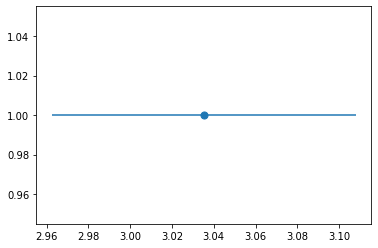

In [23]:
error = 2 * se # или t_crit * se
plt.scatter(x = coef, y = 1, s = 50);
plt.errorbar(x = coef, y = 1, xerr = error);

Как из этого графика получить наблюдаемое значение t-статистики? Давайте вычислим его примерное значение, а также p-value, а затем пересчитаем всё точно и сравним результаты!

In [24]:
# примерно на основе графика

coeff = 3.03
std_error = (3.10 - 2.96) / 4
t_obs = coeff / std_error
print(t_obs)

86.57142857142848


In [25]:
# можно догадаться, что pvalue=0,
# но честно посчитаем

2 * (1 - stats.t(df = 58).cdf(t_obs))

0.0